1. Correlation between Music types and RT

ANOVA F-statistic: 0.71, p-value: 0.4895


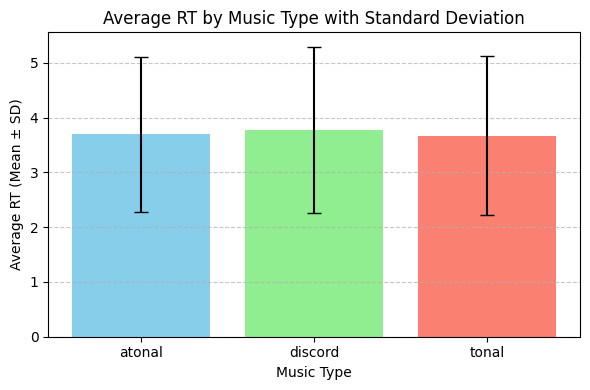

'Music type does not have a significant effect on reaction time (RT).'

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

def analyze_rt_by_music_type(file_path):
    """
    Analyzes reaction time (RT) differences between music types and performs ANOVA.
    
    Parameters:
        file_path (str): Path to the Excel file containing the data.
        
    Returns:
        str: Conclusion based on the ANOVA test result.
    """
    # Read the Excel file
    data = pd.read_excel(file_path)

    # Ensure the required columns are present
    required_columns = ["participant_id", "music_type", "RT"]
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The input file must contain the following columns: {required_columns}")

    # Perform ANOVA to check for significant differences between music types
    tonal = data[data["music_type"] == "tonal"]["RT"]
    atonal = data[data["music_type"] == "atonal"]["RT"]
    discord = data[data["music_type"] == "discord"]["RT"]

    f_stat, p_value = f_oneway(tonal, atonal, discord)
    print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

    # Interpret the results
    if p_value < 0.05:
        conclusion = "Music type has a significant effect on reaction time (RT)."
    else:
        conclusion = "Music type does not have a significant effect on reaction time (RT)."

    # Calculate mean and standard deviation of RT for each music type
    summary_stats = data.groupby("music_type")["RT"].agg(["mean", "std"]).reset_index()

    # Plot the bar chart with error bars
    plt.figure(figsize=(6, 4))
    plt.bar(
        summary_stats["music_type"], 
        summary_stats["mean"], 
        yerr=summary_stats["std"], 
        capsize=5, 
        color=["skyblue", "lightgreen", "salmon"]
    )

    # Add labels, title, and grid
    plt.xlabel("Music Type")
    plt.ylabel("Average RT (Mean ± SD)")
    plt.title("Average RT by Music Type with Standard Deviation")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return conclusion

# Example usage:
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
analyze_rt_by_music_type(file_path)



**2. Correlation between music type and Introspective sensitivity**

Correlation between music type and Introspective sensitivity: -0.000
                  sum_sq      df         F    PR(>F)
C(music_type)   0.000013     2.0  0.000197  0.999803
Residual       33.936389  1013.0       NaN       NaN


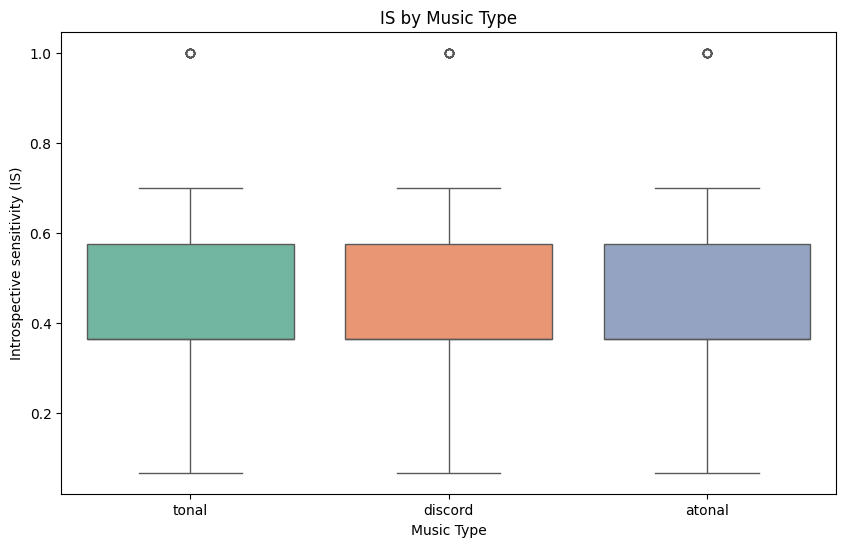

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm



def analyze_music_type_vs_IS(trial_combined_path = str):
    """
    Analyze the relationship between 'music_type' and 'IS'.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing 'music_type' and 'IS' columns.

    Returns:
        tuple: Correlation value and ANOVA table.
    """
    # Reading the file
    df = pd.read_excel(trial_combined_path)

    # 1. Correlation between 'music_type' and 'IS'
    df['music_type_numeric'] = df['music_type'].astype('category').cat.codes  # Convert music_type to numeric
    correlation = df['music_type_numeric'].corr(df['IS'])
    print(f"Correlation between music type and Introspective sensitivity: {correlation:.3f}")

    # 2. ANOVA test for 'music_type' and 'IS'
    model = ols('IS ~ C(music_type)', data=df).fit()  # Fit the model
    anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA
    print(anova_table)

    # 3. Graph of IS vs music_type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_type', y='IS', data=df, palette="Set2", hue='music_type')
    plt.title('IS by Music Type')
    plt.xlabel('Music Type')
    plt.ylabel('Introspective sensitivity (IS)')
    #plt.savefig('graph.png')
    plt.show()


trial_combined_path = (
    r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
)
analyze_music_type_vs_IS(trial_combined_path)

**3. Correlation between Valence rating and PPG**

Spearman’s correlation coefficient: -0.001, p-value: 0.958
No statistically significant relationship between the variables.


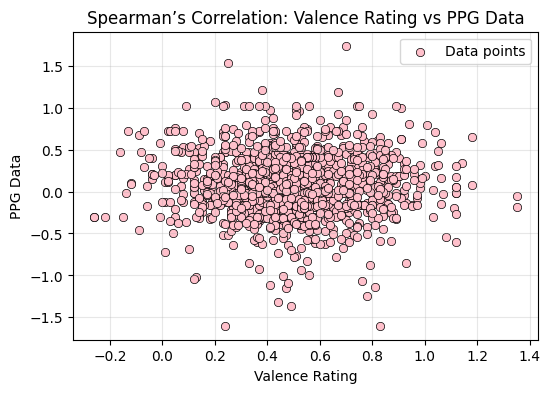

In [24]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

def calculate_spearman_correlation(trial_combined_path):
    # Reading the excel file
    data = pd.read_excel(trial_combined_path)
    
    # Clean column names (strip any extra spaces)
    data.columns = data.columns.str.strip()
    
    # Remove NaN values from the specific columns
    data_clean = data.dropna(subset=['valence_rating', 'PPG_data'])
    
    # Calculate Spearman's correlation coefficient and p-value
    corr, p_value = spearmanr(data_clean['valence_rating'], data_clean['PPG_data'])
    
    # Print Spearman’s correlation coefficient and p-value
    print(f'Spearman’s correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}')
    
    # Print conclusion about statistical dependency
    if p_value > 0.05:
        print("No statistically significant relationship between the variables.")
    else:
        print("There is a statistically significant relationship between the variables.")
    
    # Plot the data points
    plt.figure(figsize=(6, 4))
    plt.grid(alpha=0.3)
    plt.scatter(data_clean['valence_rating'], data_clean['PPG_data'], color='pink', edgecolor='black', linewidths=0.5, label='Data points')
    plt.title('Spearman’s Correlation: Valence Rating vs PPG Data')
    plt.xlabel('Valence Rating')
    plt.ylabel('PPG Data')
    plt.grid(True)
    plt.legend()
    plt.show()

trial_combined_path = (r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx")
calculate_spearman_correlation(trial_combined_path)


**4. Correlation between Valence rating and Introspective sensitivity**

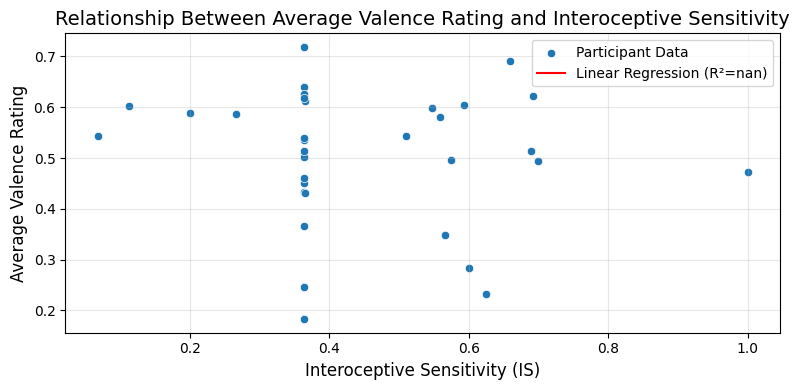

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd

def plot_valence_vs_interoception(file_path):
    """
    Plots the relationship between average valence rating and interoceptive sensitivity (IS).

    Parameters:
        file_path (str): Path to the Excel file containing the data.
    
    Returns:
        None
    """
    # Load data (no need for sheet_name)
    data = pd.read_excel(file_path)

    # Group by participant_id to calculate the average valence_rating and IS for each participant
    grouped_data = data.groupby('participant_id').agg({
        'valence_rating': 'mean',
        'IS': 'mean'
    }).reset_index()

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        grouped_data['IS'], grouped_data['valence_rating']
    )

    # Plotting the scatter plot with regression line
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='IS', y='valence_rating', data=grouped_data, label='Participant Data')
    plt.plot(
        grouped_data['IS'], 
        slope * grouped_data['IS'] + intercept, 
        color='red', label=f'Linear Regression (R²={r_value**2:.2f})'
    )

    # Customize the plot
    plt.title('Relationship Between Average Valence Rating and Interoceptive Sensitivity', fontsize=14)
    plt.xlabel('Interoceptive Sensitivity (IS)', fontsize=12)
    plt.ylabel('Average Valence Rating', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()

file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
plot_valence_vs_interoception(file_path)

   participant_id music_type        IS
0               1     atonal  0.364228
1               1    discord  0.364228
2               1      tonal  0.364228
3               2     atonal  0.364878
4               2    discord  0.364878
Correlation between music type and Introspective sensitivity: -0.000
                     sum_sq    df             F  PR(>F)
C(music_type)  1.503605e-14   2.0  2.191453e-13     1.0
Residual       3.396306e+00  99.0           NaN     NaN


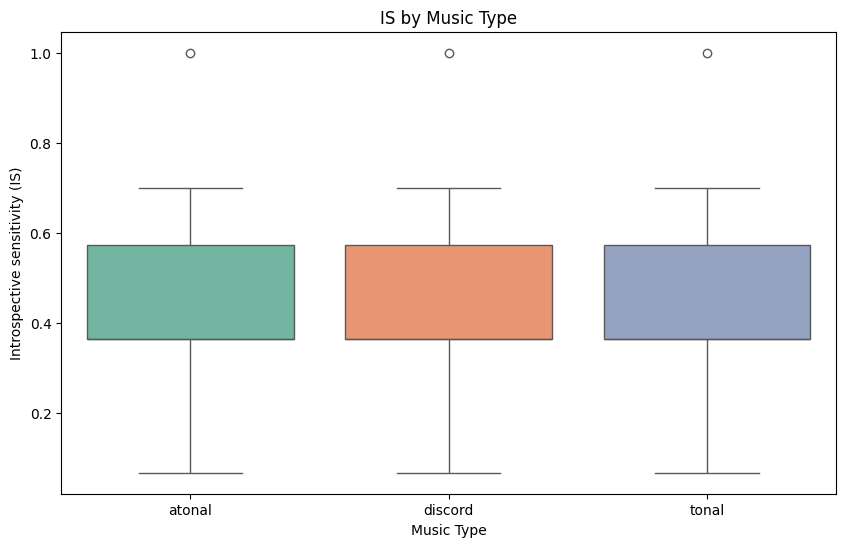

(np.float64(-3.5707511609624944e-12),
                      sum_sq    df             F  PR(>F)
 C(music_type)  1.503605e-14   2.0  2.191453e-13     1.0
 Residual       3.396306e+00  99.0           NaN     NaN)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


def analyze_music_type_vs_IS(trial_combined_path=str):
    """Analyze the relationship between 'music_type' and 'IS' while accounting for each participant.

    Parameters:
        trial_combined_path (str): Path to the Excel file containing 'music_type', 'participant_id', and relevant columns.

    Returns:
        tuple: Correlation value and ANOVA table.
    """
    # Reading the file
    df = pd.read_excel(trial_combined_path)

    # Ensure necessary columns exist
    required_columns = ["participant_id", "music_type", "IS"]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")

    # 1. Calculate IS separately for each participant and music type
    grouped = df.groupby(["participant_id", "music_type"])["IS"].mean().reset_index()
    print(grouped.head())  # Optional: Show the first few rows of grouped data

    # 2. Correlation between 'music_type' and 'IS'
    grouped["music_type_numeric"] = grouped["music_type"].astype("category").cat.codes  # Convert music_type to numeric
    correlation = grouped["music_type_numeric"].corr(grouped["IS"])
    print(f"Correlation between music type and Introspective sensitivity: {correlation:.3f}")

    # 3. ANOVA test for 'music_type' and 'IS'
    model = ols("IS ~ C(music_type)", data=grouped).fit()  # Fit the model
    anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA
    print(anova_table)

    # 4. Graph of IS vs music_type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="music_type", y="IS", data=grouped, palette="Set2", hue="music_type")
    plt.title("IS by Music Type")
    plt.xlabel("Music Type")
    plt.ylabel("Introspective sensitivity (IS)")
    plt.show()

    return correlation, anova_table


file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
analyze_music_type_vs_IS(trial_combined_path)
